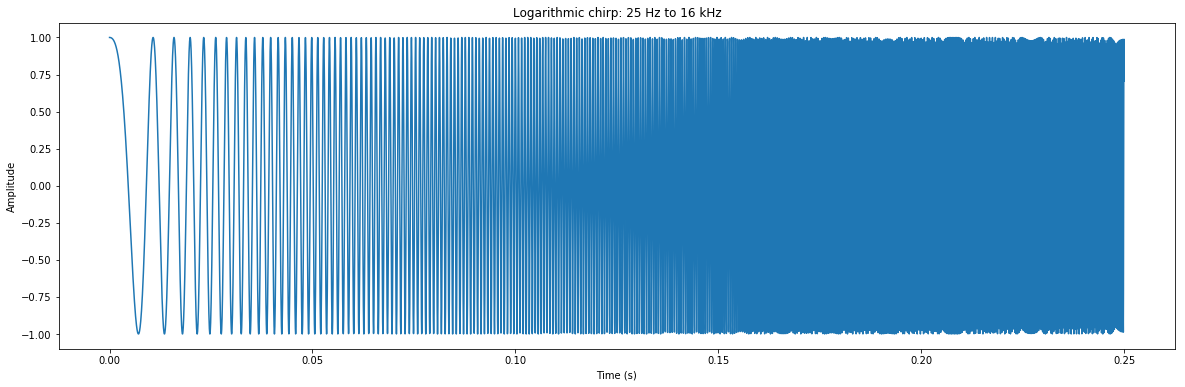

In [287]:
%matplotlib inline

import scipy
from scipy import signal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n = 32000//4
xs = np.linspace(0, n/32000, n)
ys = scipy.signal.chirp(xs, 25, 0.25, 3200, method='linear')


f = plt.figure(figsize=(20, 6))
ax = f.add_subplot(1, 1, 1,
                   title='Logarithmic chirp: 25 Hz to 16 kHz',
                   xlabel='Time (s)', ylabel='Amplitude')
ax.plot(xs, ys)

import IPython.display

IPython.display.Audio(ys, rate=32000)


In [288]:
fs = 32000
fs_nyquist = fs // 2

plotn = 3200

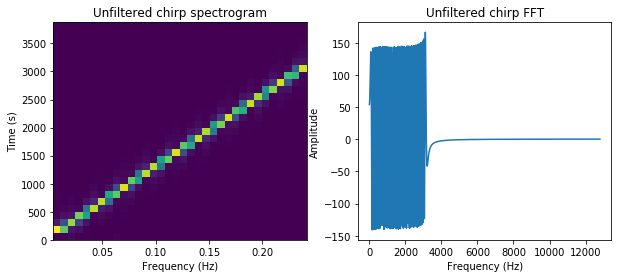

In [289]:

fig = plt.figure(figsize=(10, 4))

f, t, spec = scipy.signal.spectrogram(ys, fs)
ax = fig.add_subplot(1, 2, 1,
                    title='Unfiltered chirp spectrogram',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 2, 2,
                    title='Unfiltered chirp FFT',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys)
f = np.fft.rfftfreq(n, 1/fs)
ax.plot(f[:plotn], sp.real[:plotn])

None

order: 4
fs: 32000 nyquist: 16000
fstop1: 0.01875 fstop2: 0.05

bs: [ 5.12320597e-06  0.00000000e+00 -2.04928239e-05  0.00000000e+00
  3.07392358e-05  0.00000000e+00 -2.04928239e-05  0.00000000e+00
  5.12320597e-06]
as: [  1.          -7.70768122  26.02927945 -50.3036136   60.84900164
 -47.17652194  22.8938119   -6.35790442   0.77362822]

SOS: [[ 5.12320597e-06  1.02464119e-05  5.12320597e-06  1.00000000e+00
  -1.88200268e+00  8.95569476e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.92539642e+00  9.31169369e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.92504862e+00  9.47724165e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.97523350e+00  9.78864062e-01]]

30 coefficients


[ 5.12320597e-06  0.00000000e+00 -2.04928239e-05  0.00000000e+00
  3.07392358e-05  0.00000000e+00 -2.04928239e-05  0.00000000e+00
  5.12320597e-06]
[  1.          -7.70768122  26.02927945 -50.3036136   60.84900164
 -47.17652194  2

/home/zack/src/filter-benchmarks/filter-env/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


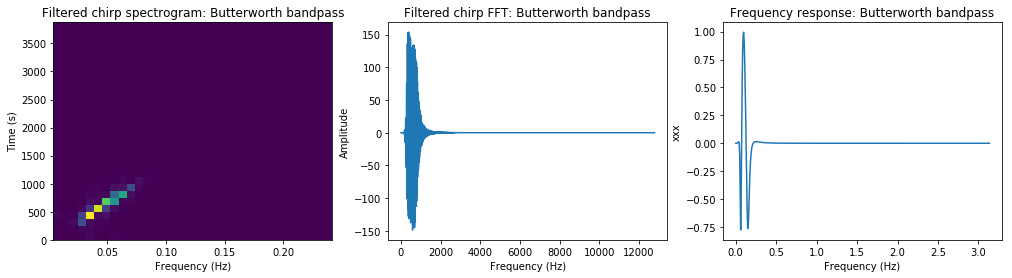

In [301]:
N = 4
fstop1 = 300 / fs_nyquist
fstop2 = 800 / fs_nyquist
print('order:', N)
print('fs:', fs, 'nyquist:', fs_nyquist)
print('fstop1:', fstop1, 'fstop2:', fstop2)
print()

b, a = scipy.signal.butter(N, (fstop1, fstop2), btype='bandpass', analog=False, output='ba')
sos_butter = scipy.signal.butter(N, (fstop1, fstop2), btype='bandpass', analog=False, output='sos')
print('bs:', b)
print('as:', a)
print()
print('SOS:', sos_butter)
print()
print(sum(len(a) for a in sos), 'coefficients')

ys_butter = scipy.signal.lfilter(b, a, ys)

fig = plt.figure(figsize=(17, 4))

f, t, spec = scipy.signal.spectrogram(ys_butter, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: Butterworth bandpass',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: Butterworth bandpass',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_butter)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: Butterworth bandpass',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(b, a, plot=ax.plot)
None



103


/home/zack/src/filter-benchmarks/filter-env/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


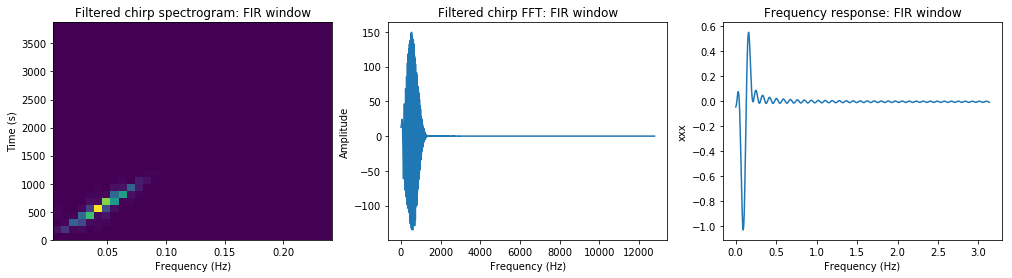

In [302]:
from scipy import signal

N = 103
hs_firwin = signal.firwin(N, (300, 800), pass_zero=False, fs=fs)
ys_firwin = signal.lfilter(hs_firwin, 1.0, ys)

print(len(hs_firwin))
with open('Src/fir.c', 'w') as f:
    f.write("""const unsigned char firCoeffsRaw[] = {{
{}
}};

const float *const firCoeffs = (float *)firCoeffsRaw;
""".format(', '.join(map(hex, np.array(hs_firwin, dtype=np.float32).tobytes()))))

fig = plt.figure(figsize=(17, 4))

f, t, spec = scipy.signal.spectrogram(ys_firwin, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: FIR window',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: FIR window',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_firwin)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: FIR window',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(hs, plot=ax.plot)
None

(129, 35)


/home/zack/src/filter-benchmarks/filter-env/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


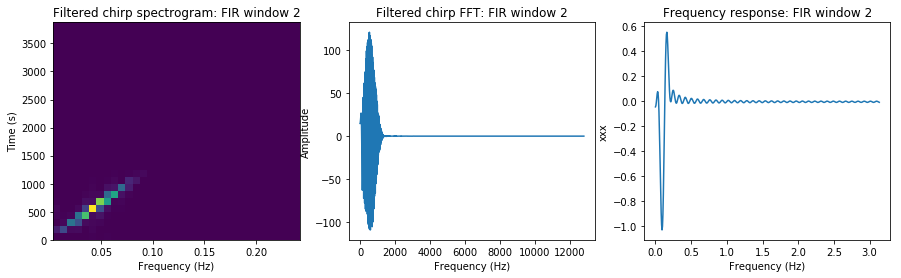

In [270]:
from scipy import signal

nyquist = fs_nyquist
N = 103

fstop1 = 300
fstop2 = 800
hs_firwin2 = signal.firwin2(N, (0.0, fstop1-100, fstop1, fstop2, fstop2+100, nyquist), (0.0, 0.0, 1.0, 1.0, 0.0, 0.0), fs=fs)
ys_firwin2 = signal.lfilter(hs_firwin2, 1.0, ys)


fig = plt.figure(figsize=(15, 4))

f, t, spec = scipy.signal.spectrogram(ys_firwin2, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: FIR window 2',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
print(spec.shape)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: FIR window 2',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_firwin2)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: FIR window 2',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(hs, plot=ax.plot)
None

/home/zack/src/filter-benchmarks/filter-env/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


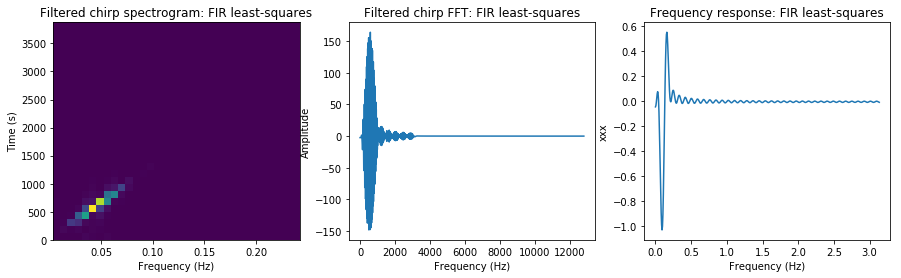

In [271]:
from scipy import signal

N = 73

hs_firls = np.array(signal.firls(N, (0.0, fstop1-100, fstop1, fstop2, fstop2+100, nyquist), (0.0, 0.0, 1.0, 1.0, 0.0, 0.0), fs=fs), dtype=np.float32)

ys_firls = signal.lfilter(hs_firls, 1.0, ys)


fig = plt.figure(figsize=(15, 4))

f, t, spec = scipy.signal.spectrogram(ys_firls, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: FIR least-squares',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: FIR least-squares',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_firls)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: FIR least-squares',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(hs, plot=ax.plot)
None

[ 0.06852759 -0.54160184  1.87921162 -3.73887082  4.6654669  -3.73887082
  1.87921162 -0.54160184  0.06852759] 9
[  1.          -7.86209987  27.0906875  -53.43517182  65.98994376
 -52.24826904  25.90065201  -7.3498387    0.91409616] 9
[[ 0.06852759 -0.13269426  0.06852759  1.         -1.93388063  0.95070087]
 [ 1.         -1.99867028  1.          1.         -1.96832056  0.97321428]
 [ 1.         -1.97135951  1.          1.         -1.96665307  0.99123172]
 [ 1.         -1.99702041  1.          1.         -1.9932456   0.9966997 ]]


/home/zack/src/filter-benchmarks/filter-env/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


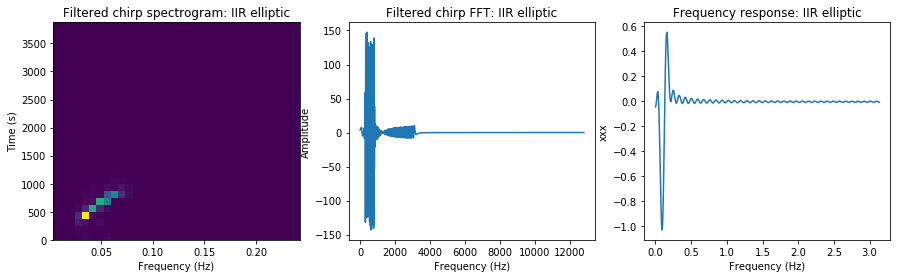

In [294]:
from scipy import signal

fpass1 = 300 / nyquist
fpass2 = 800 / nyquist
fstop1 = 200 / nyquist
fstop2 = 900 / nyquist
b_iir, a_iir = signal.iirdesign((fpass1, fpass2), (fstop1, fstop2), 1, 23, ftype='ellip')
sos_iir = signal.iirdesign((fpass1, fpass2), (fstop1, fstop2), 1, 23, ftype='ellip', output='sos')

print(b_iir, len(b_iir))
print(a_iir, len(a_iir))
print(sos_iir)
#with open('Src/iir.c', 'w') as f:
#    f.write("""const float iirCoeffsRaw[] = {{
#{}
#}};

#const float *const iirCoeffs = (float *)iirCoeffsRaw;""".format())

ys_iirellip = signal.lfilter(b_iir, a_iir, ys)


fig = plt.figure(figsize=(15, 4))

f, t, spec = scipy.signal.spectrogram(ys_iirellip, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: IIR elliptic',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: IIR elliptic',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_iirellip)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: IIR elliptic',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(hs, plot=ax.plot)
None

-----------------------------

Now let's make some noise! (and filter it!)

[-0.28250328 -0.54836595 -0.09763864  0.20153269 -0.82311034  0.7056428
 -0.43740934 -0.319714   -0.4146811  -0.16955647 -0.53275263 -0.3985784
  0.7212549   0.8593553   0.1912109   0.65450734 -0.26928693 -0.39099368
  0.13977253  0.43839702 -0.37044168  0.15803787 -0.72411984  0.5571772
 -0.6215175   0.5750225   0.9991951  -0.3884049   0.8069934   0.21902306
  0.9243143   0.3153064  -0.81550217  0.28063878 -0.70408463 -0.3965057
 -0.94039077 -0.9863599   0.06468867  0.14457302 -0.32049057  0.7447189
  0.29191303  0.16393273  0.08426746  0.26513612  0.8043792  -0.36261278
 -0.29314494 -0.8974903  -0.2215001   0.67571235 -0.6670957   0.6256793
  0.61760515  0.7174109  -0.05500831  0.2399893  -0.9725617  -0.3317482
  0.88002676  0.35331038 -0.6123465  -0.5027507 ]


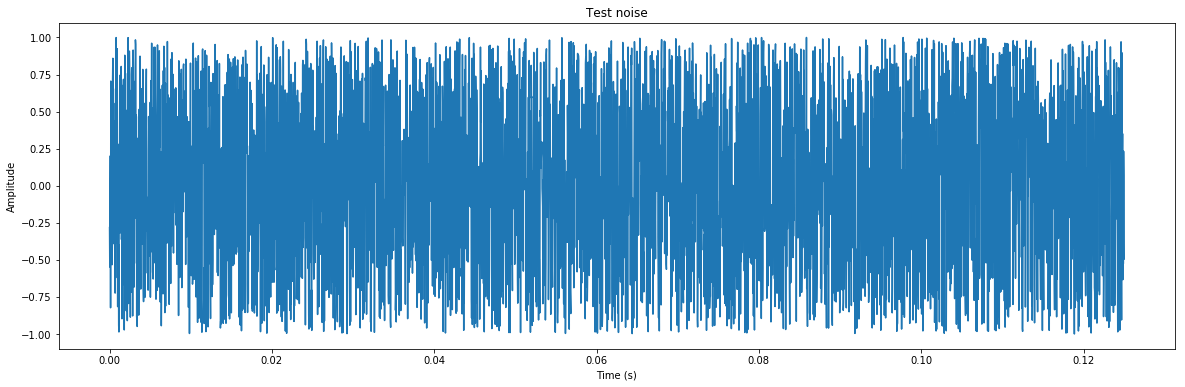

In [307]:
import random as rand

rand.seed(649)

n = 32000//8
xs = np.linspace(0, n/32000, n)
#ys = scipy.signal.chirp(xs, 25, 0.25, 3200, method='linear')
ys = np.array([rand.uniform(-1, 1) for _ in range(n)], dtype=np.float32)
print(ys[:64])

f = plt.figure(figsize=(20, 6))
ax = f.add_subplot(1, 1, 1,
                   title='Test noise',
                   xlabel='Time (s)', ylabel='Amplitude')
ax.plot(xs, ys)

IPython.display.Audio(ys, rate=32000)


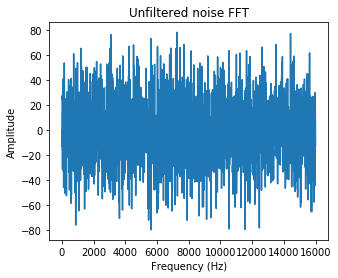

In [274]:

fig = plt.figure(figsize=(5, 4))

ax = fig.add_subplot(1, 1, 1,
                    title='Unfiltered noise FFT',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys)
f = np.fft.rfftfreq(n, 1/fs)
ax.plot(f[:plotn], sp.real[:plotn])

None

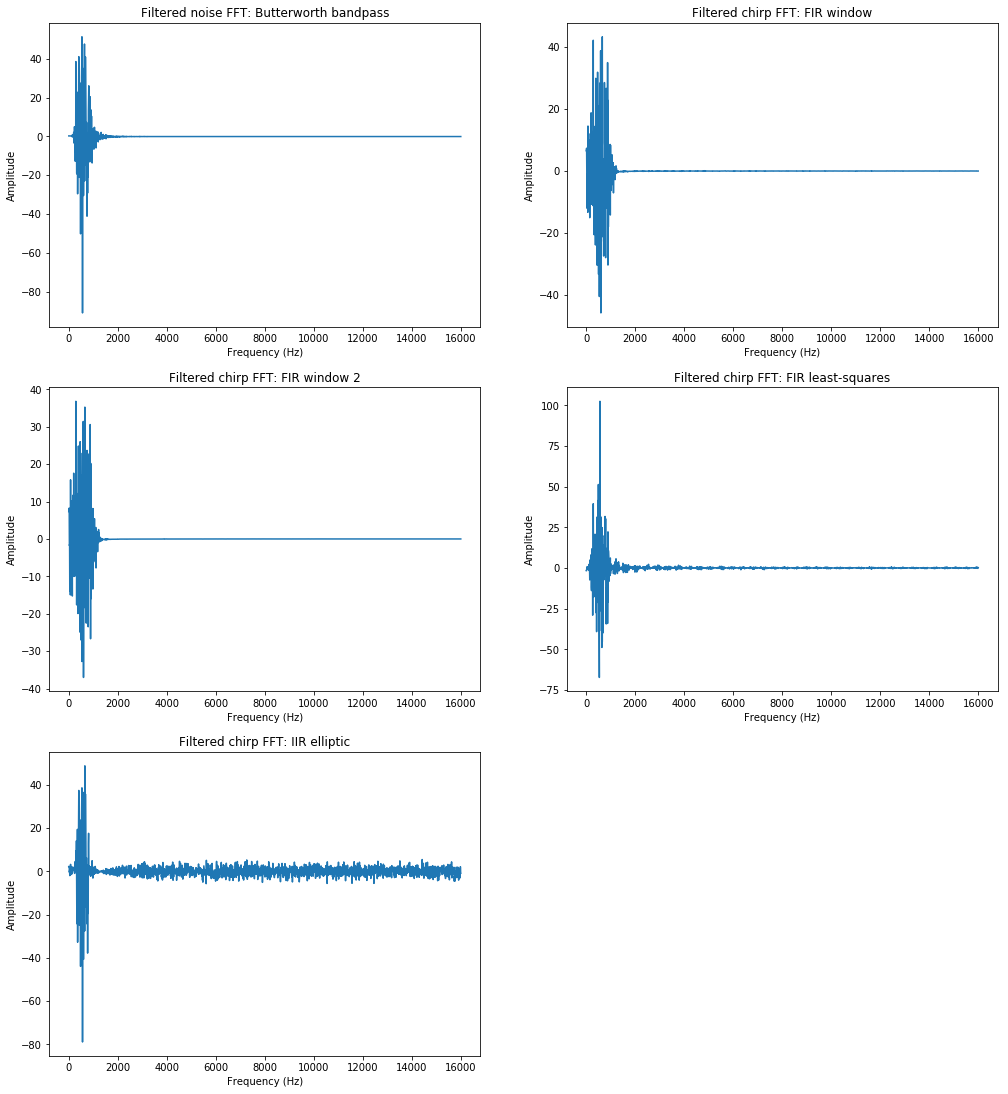

In [275]:
# ------------------------------
# Butterworth
# ------------------------------

ys_butter = scipy.signal.sosfilt(sos_butter, ys)

fig = plt.figure(figsize=(17, 19))

ax = fig.add_subplot(3, 2, 1,
                    title='Filtered noise FFT: Butterworth bandpass',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_butter)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])



# ------------------------------
# FIR window
# ------------------------------

ys_firwin = signal.lfilter(hs_firwin, 1.0, ys)

ax = fig.add_subplot(3, 2, 2,
                    title='Filtered chirp FFT: FIR window',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_firwin)
f = np.fft.rfftfreq(n, 1/fs)
ax.plot(f[:plotn], sp.real[:plotn])



# ------------------------------
# FIR window 2
# ------------------------------

ys_firwin2 = signal.lfilter(hs_firwin2, 1.0, ys)

ax = fig.add_subplot(3, 2, 3,
                    title='Filtered chirp FFT: FIR window 2',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_firwin2)
f = np.fft.rfftfreq(n, 1/fs)
ax.plot(f[:plotn], sp.real[:plotn])



# ------------------------------
# FIR least-squares
# ------------------------------

ys_firls = signal.lfilter(hs_firls, 1.0, ys)

ax = fig.add_subplot(3, 2, 4,
                    title='Filtered chirp FFT: FIR least-squares',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_firls)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])



# ------------------------------
# IIR (elliptical)
# ------------------------------

ys_iirellip = signal.lfilter(b_iir, a_iir, ys)

ax = fig.add_subplot(3, 2, 5,
                    title='Filtered chirp FFT: IIR elliptic',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_iirellip)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


None

In [276]:

import os
print(os.getcwd())
cmsis_out = np.fromfile('fir_out.bin', dtype=np.float32)

print(len(cmsis_out), len(ys_firwin))
print(cmsis_out[1:16])
print(cmsis_out[-15:])
print(ys_firwin[:15])
print(ys_firwin[-16:-1])


/home/zack/src/filter-benchmarks
4000 4000
[-0.00016399 -0.00047831 -0.00052119 -0.0003815  -0.00082639 -0.00035356
 -0.00052174 -0.00057493 -0.00062309 -0.00045056 -0.00039406 -0.00013906
  0.00090928  0.00219125  0.00325623]
[0.05297677 0.05690034 0.05978248 0.06224719 0.06258841 0.06172878
 0.05977936 0.05806299 0.0541509  0.05044656 0.04416215 0.03838152
 0.03037012 0.02281514 0.013891  ]
[-0.00016399 -0.00047831 -0.00052119 -0.0003815  -0.00082639 -0.00035356
 -0.00052174 -0.00057493 -0.00062309 -0.00045056 -0.00039406 -0.00013906
  0.00090928  0.00219125  0.00325623]
[0.05297677 0.05690034 0.05978247 0.06224718 0.0625884  0.06172878
 0.05977937 0.05806298 0.05415091 0.05044654 0.04416214 0.03838152
 0.03037012 0.02281514 0.01389101]


In [277]:

from statistics import mean
from math import sqrt

def rmse(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))
    #return sqrt(mean((x1 - x2)**2 for x1 in v1 for x2 in v2))



# scipy impl vs CMSIS f32 FIR
rmse(ys_firwin[:-1], cmsis_out[1:])

1.2039621314815545e-06

In [305]:
fir_f32 = np.fromfile('arm_fir_f32.bin', dtype=np.float32)
fir_q31 = np.fromfile('arm_fir_q31.bin', dtype=np.float32)

rmse(fir_f32, fir_q31)

1.2163174e-06

In [306]:
iir_f32 = np.fromfile('arm_biquad_cascade_df2T_f32.bin', dtype=np.float32)
iir_q31 = np.fromfile('arm_biquad_cas_df1_32x64_q31.bin', dtype=np.float32)

rmse(iir_f32, iir_q31)

3.830862e-05